# PCA and ICA

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import mne
from mne.preprocessing import ICA
import scipy.signal as signal
from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA

### Implementing Singular Value Decomposition

In [3]:
def svd(X):
    n, m = X.shape
    X_center = X - np.mean(X, axis=0)
    covariance = np.dot(X_center.T, X_center) / (n-1)
    eigenvalues, eigenvectors = np.linalg.eig(covariance)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]
    singular_values = np.sqrt(eigenvalues)
    U = np.dot(X_center, eigenvectors) / singular_values
    return U, singular_values, eigenvectors.T

### Implementing PCA using SVD

In [4]:
def pca_using_svd(X):
    U, S, V = svd(X)
    Z = np.dot(U, np.diag(S))
    return Z, V.T

### Implementing PCA using covariance matrix and eigen values

In [5]:
def pca_using_covmat(X):
    n, m = X.shape
    X_center = X - np.mean(X, axis=0)
    C = np.dot(X_center.T, X_center) / (n - 1)
    eigen_values, eigen_vectors = np.linalg.eig(C)
    eigen_pairs = [(np.abs(eigen_values[i]), eigen_vectors[:, i]) for i in range(m)]
    eigen_pairs.sort(key=lambda x: x[0], reverse=True)
    W = np.hstack([eigen_pairs[i][1].reshape(m, 1) for i in range(m)])
    Z = np.dot(X_center, W)
    return Z, W

In [6]:
def signal_to_noise_ratio(signal, noise):
    return 10 * np.log10(np.sum(signal ** 2) / np.sum(noise ** 2))

In [7]:
def signal_statics(signal):
    return np.mean(signal), np.std(signal)

In [8]:
def plot_components(Z, t):
    n, m = Z.shape
    plt.figure(figsize=(20, 10))
    for i in range(m):
        plt.plot(t, Z[:, i], label=f'Component {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()

In [9]:
def plot_components_separately(S_,t):
    f,ax = plt.subplots(2,2,figsize=(20,10))
    ax[0,0].plot(t, S_[:,0], label='Component 1')
    ax[0,0].plot(t, S_[:,1], label='Component 2')
    ax[0,0].plot(t, S_[:,2], label='Component 3')
    ax[0,0].set_xlabel('Time (s)')
    ax[0,0].set_ylabel('Amplitude')
    ax[0,0].legend()
    ax[0,1].plot(t, S_[:,0], label='Component 1')
    ax[0,1].set_xlabel('Time (s)')
    ax[0,1].set_ylabel('Amplitude')
    ax[0,1].legend()
    ax[1,0].plot(t, S_[:,1], label='Component 2')
    ax[1,0].set_xlabel('Time (s)')
    ax[1,0].set_ylabel('Amplitude')
    ax[1,0].legend()
    ax[1,1].plot(t, S_[:,2], label='Component 3')
    ax[1,1].set_xlabel('Time (s)')
    ax[1,1].set_ylabel('Amplitude')
    ax[1,1].legend()

# PART - A

#### Generating Signals

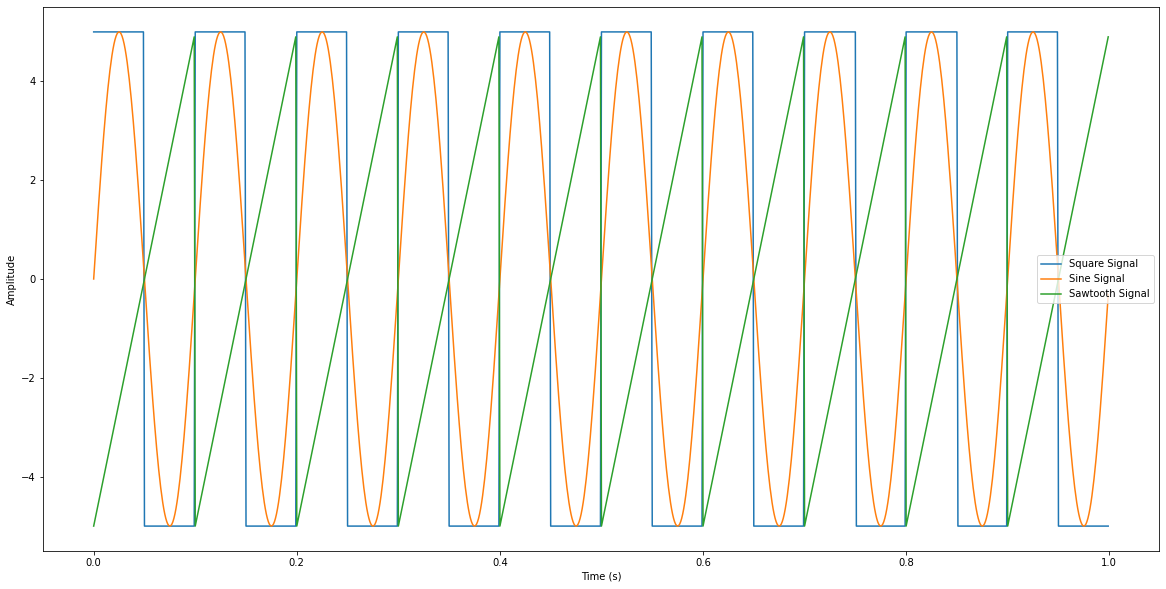

In [10]:
fs = 1000
t = np.arange(0,1, 1/fs)

square_signal = 5*signal.square(2 * np.pi * 10 * t)
sine_signal = 5*np.sin(2 * np.pi * 10 * t)
sawtooth_signal = 5*signal.sawtooth(2 * np.pi * 10 * t)

plt.figure(figsize=(20, 10))
plt.plot(t, square_signal, label='Square Signal')
plt.plot(t, sine_signal, label='Sine Signal')
plt.plot(t, sawtooth_signal, label='Sawtooth Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [11]:
square_mean,square_var = signal_statics(square_signal)
print(f'Square Signal Mean: {square_mean}, Square Signal Variance: {square_var}')
sine_mean,sine_var = signal_statics(sine_signal)
print(f'Sine Signal Mean: {sine_mean}, Sine Signal Variance: {sine_var}')
sawtooth_mean,sawtooth_var = signal_statics(sawtooth_signal)
print(f'Sawtooth Signal Mean: {sawtooth_mean}, Sawtooth Signal Variance: {sawtooth_var}')

Square Signal Mean: 0.02, Square Signal Variance: 4.999959999839999
Sine Signal Mean: -3.410605131648481e-16, Sine Signal Variance: 3.5355339059327378
Sawtooth Signal Mean: -0.04999999999999892, Sawtooth Signal Variance: 2.8866070047722117


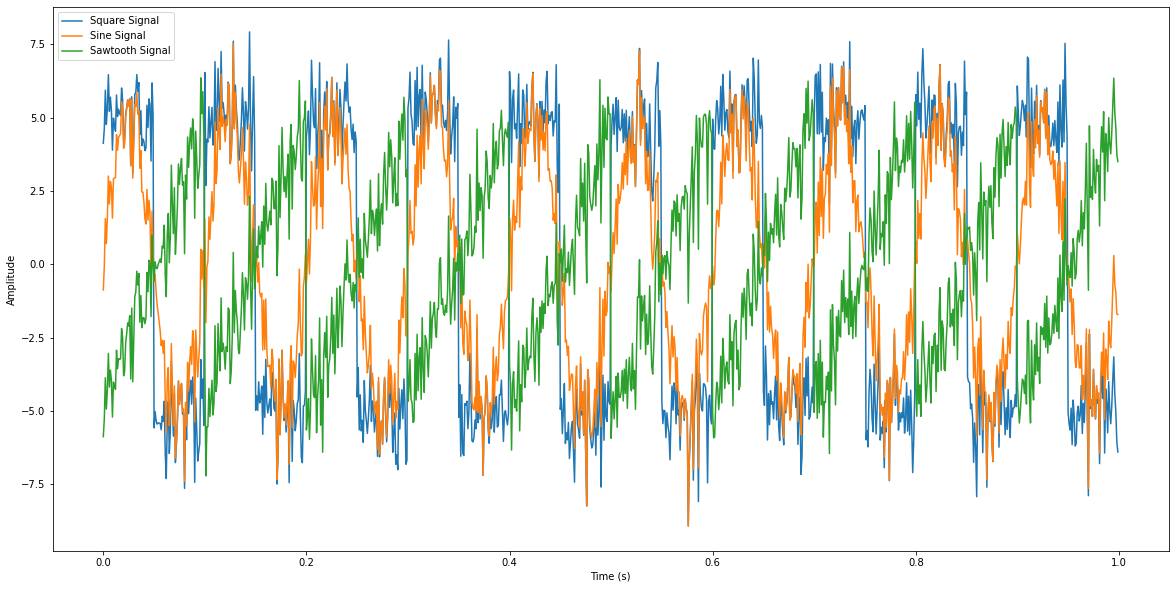

In [12]:
num_samples = len(t)

# Gaussian noise
noise = np.random.normal(0, 1, size=num_samples)

#uniform noise
#noise = np.random.uniform(-1, 1, size=num_samples)

# Adding noise to the sine signal
sine_signal_noise = sine_signal + noise
# Adding noise to the square signal
square_signal_noise = square_signal + noise
# Adding noise to the sawtooth signal
sawtooth_signal_noise = sawtooth_signal + noise

#ploting the signals
plt.figure(figsize=(20, 10))
plt.plot(t, square_signal_noise, label='Square Signal')
plt.plot(t, sine_signal_noise, label='Sine Signal')
plt.plot(t, sawtooth_signal_noise, label='Sawtooth Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()

In [13]:
square_mean,square_var = signal_statics(square_signal_noise)
print(f'Square + Noise Signal Mean: {square_mean}, Square +Noise Signal Variance: {square_var}')
print(f'SNR square +noise signal {signal_to_noise_ratio(square_signal, noise)}')
sine_mean,sine_var = signal_statics(sine_signal_noise)
print(f'Sine + Noise Signal Mean: {sine_mean}, Sine + Noise Signal Variance: {sine_var}')
print(f'SNR sine +noise signal {signal_to_noise_ratio(sine_signal, noise)}')
sawtooth_mean,sawtooth_var = signal_statics(sawtooth_signal_noise)
print(f'Sawtooth + Noise Signal Mean: {sawtooth_mean}, Sawtooth + Noise Signal Variance: {sawtooth_var}')
print(f'SNR sawtooth +noise signal {signal_to_noise_ratio(sawtooth_signal, noise)}')

Square + Noise Signal Mean: 0.0056290595796783405, Square +Noise Signal Variance: 5.130049720396878
SNR square +noise signal 13.940213728913731
Sine + Noise Signal Mean: -0.014370940420321915, Sine + Noise Signal Variance: 3.7023984460611454
SNR sine +noise signal 10.929913772273919
Sawtooth + Noise Signal Mean: -0.06437094042032047, Sawtooth + Noise Signal Variance: 3.0207535069885028
SNR sawtooth +noise signal 9.169869683833596


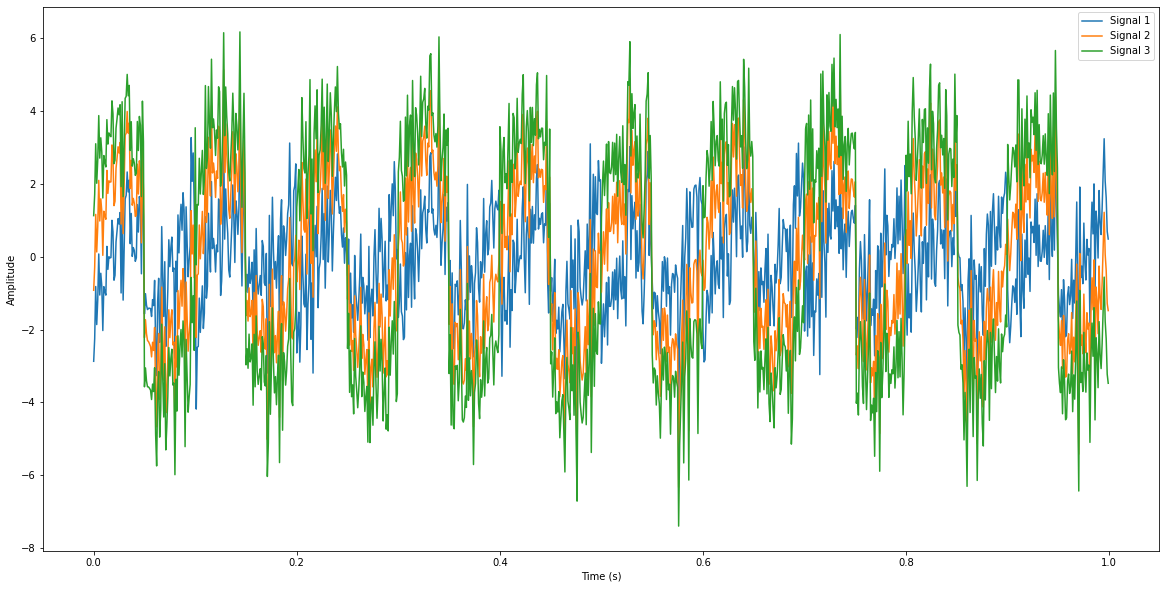

In [14]:
signal1 = 0.2*square_signal_noise + 0.2*sine_signal_noise + 0.6*sawtooth_signal_noise
signal2 = 0.33*square_signal_noise + 0.33*sine_signal_noise + 0.34*sawtooth_signal_noise
signal3 = 0.6*square_signal_noise + 0.2*sine_signal_noise + 0.2*sawtooth_signal_noise

# Ploting the signals
plt.figure(figsize=(20, 10))
plt.plot(t, signal1, label='Signal 1')
plt.plot(t, signal2, label='Signal 2')
plt.plot(t, signal3, label='Signal 3')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


In [15]:
signal1_mean,signal1_var = signal_statics(signal1)
print(f'Signal 1 Mean: {signal1_mean}, Signal 1 Variance: {signal1_var}')
print(f'SNR signal 1 {signal_to_noise_ratio(signal1, noise)}')
signal2_mean,signal2_var = signal_statics(signal2)
print(f'Signal 2 Mean: {signal2_mean}, Signal 2 Variance: {signal2_var}')
print(f'SNR signal 2 {signal_to_noise_ratio(signal2, noise)}')
signal3_mean,signal3_var = signal_statics(signal3)
print(f'Signal 3 Mean: {signal3_mean}, Signal 3 Variance: {signal3_var}')
print(f'SNR signal 3 {signal_to_noise_ratio(signal3, noise)}')

Signal 1 Mean: -0.04037094042032094, Signal 1 Variance: 1.357975555134383
SNR signal 1 2.6224892861170055
Signal 2 Mean: -0.024770940420321283, Signal 2 Variance: 2.241687071183179
SNR signal 2 6.9728436480717715
Signal 3 Mean: -0.012370940420321375, Signal 3 Variance: 3.3475625276161325
SNR signal 3 10.455446907417764


In [16]:
signal1 = signal1/signal1_var
signal2 = signal2/signal2_var
signal3 = signal3/signal3_var

#### Applying PCA on signals

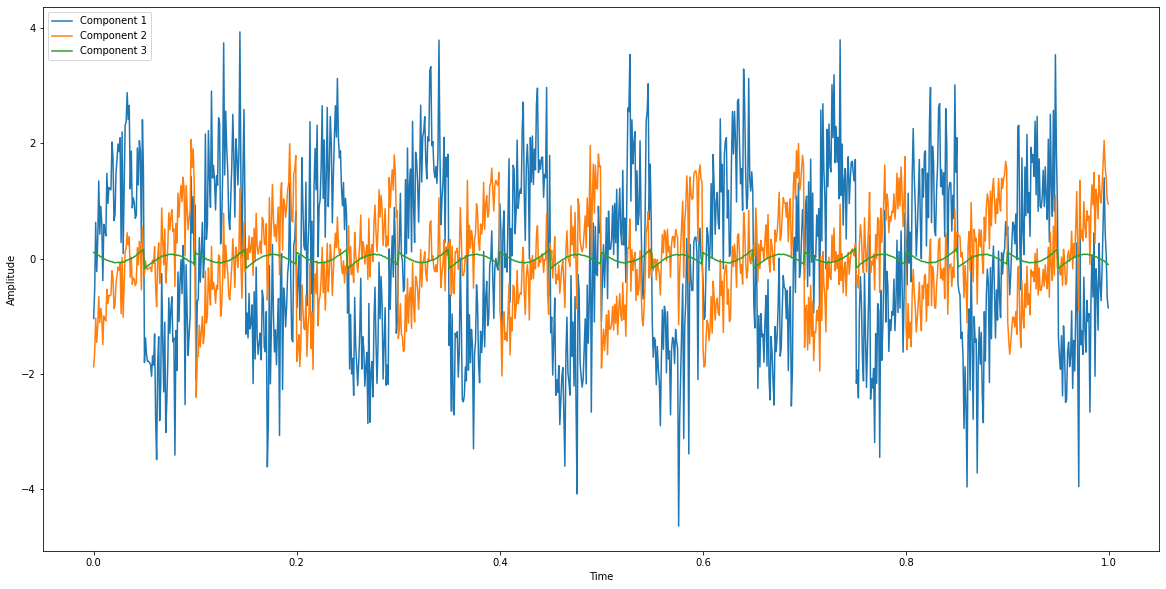

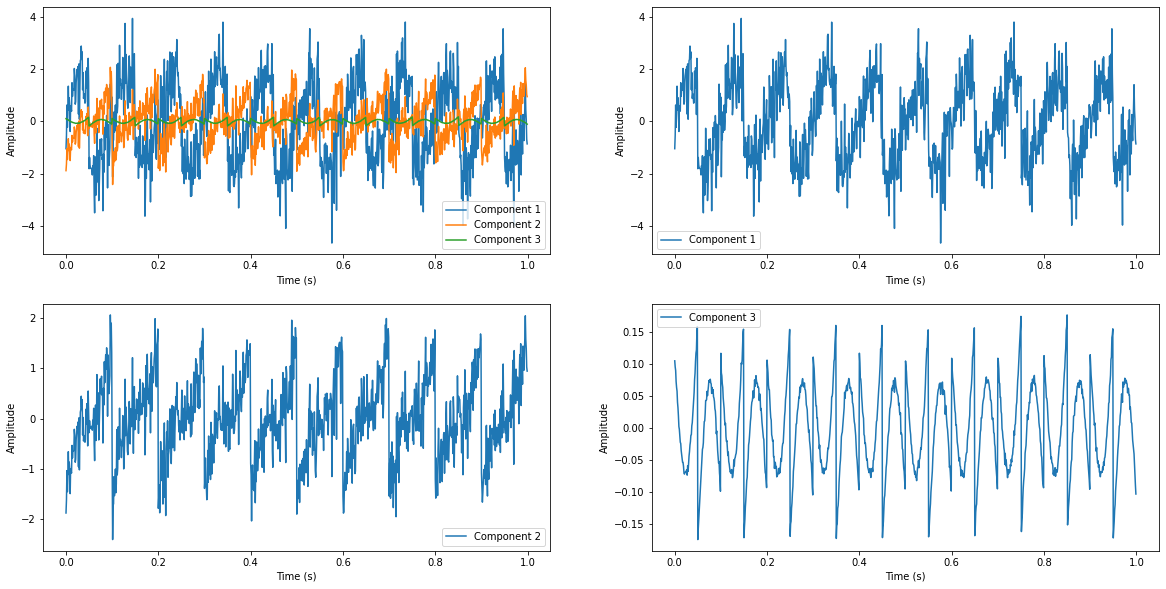

In [17]:
signals = np.column_stack([signal1, signal2, signal3])
Z, W = pca_using_covmat(signals)
plot_components(Z,t)
plot_components_separately(Z,t)

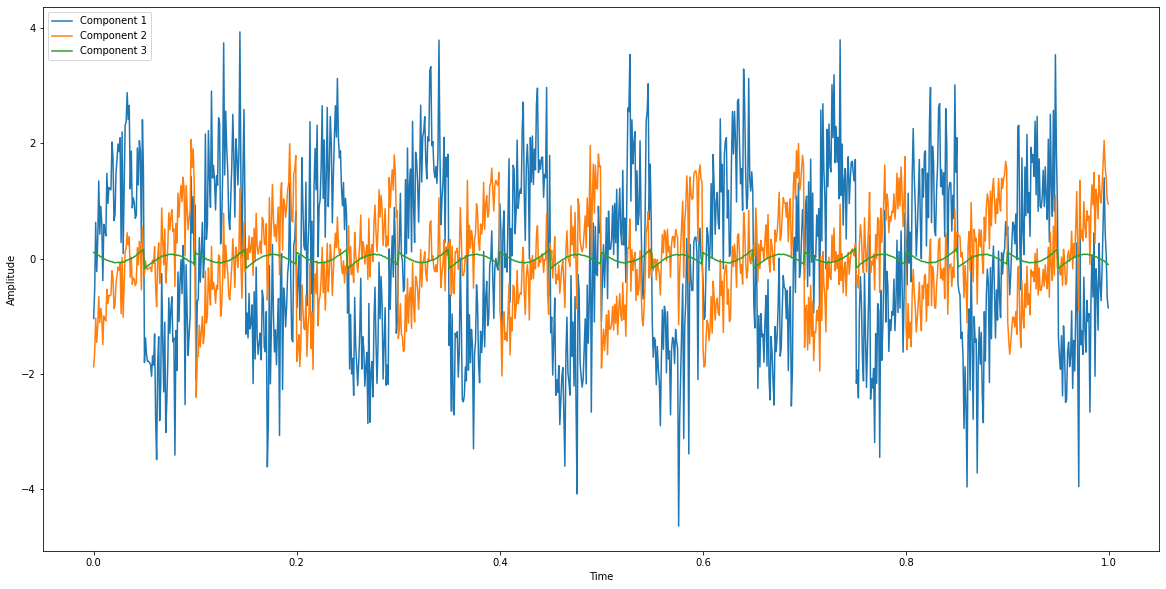

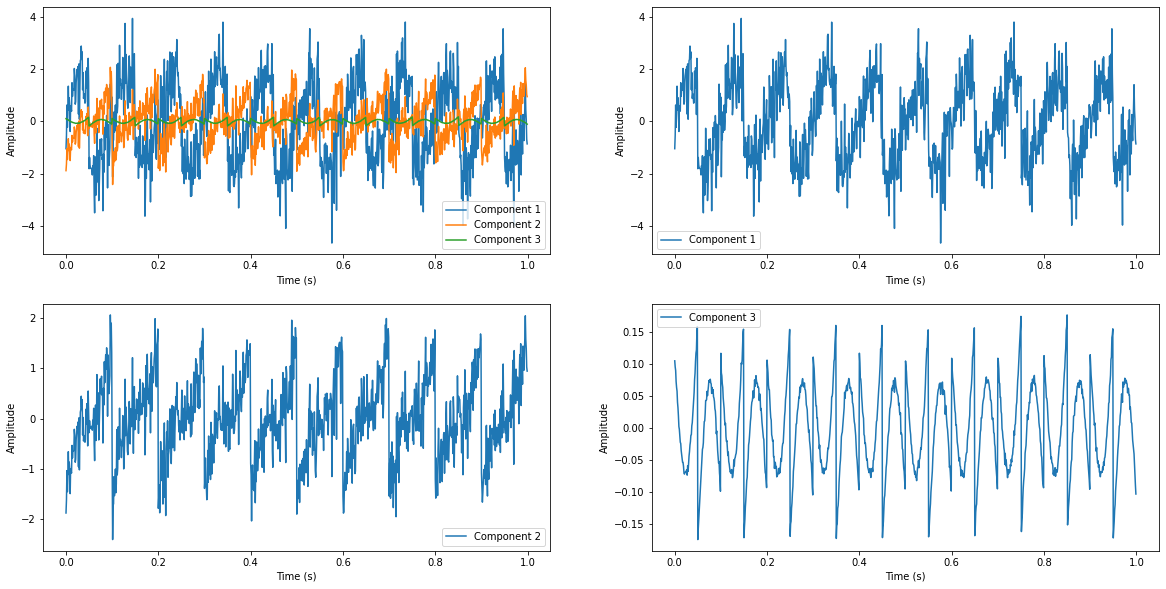

In [18]:
signals = np.column_stack([signal1, signal2, signal3])
Z, W = pca_using_svd(signals)
plot_components(Z,t)
plot_components_separately(Z,t)

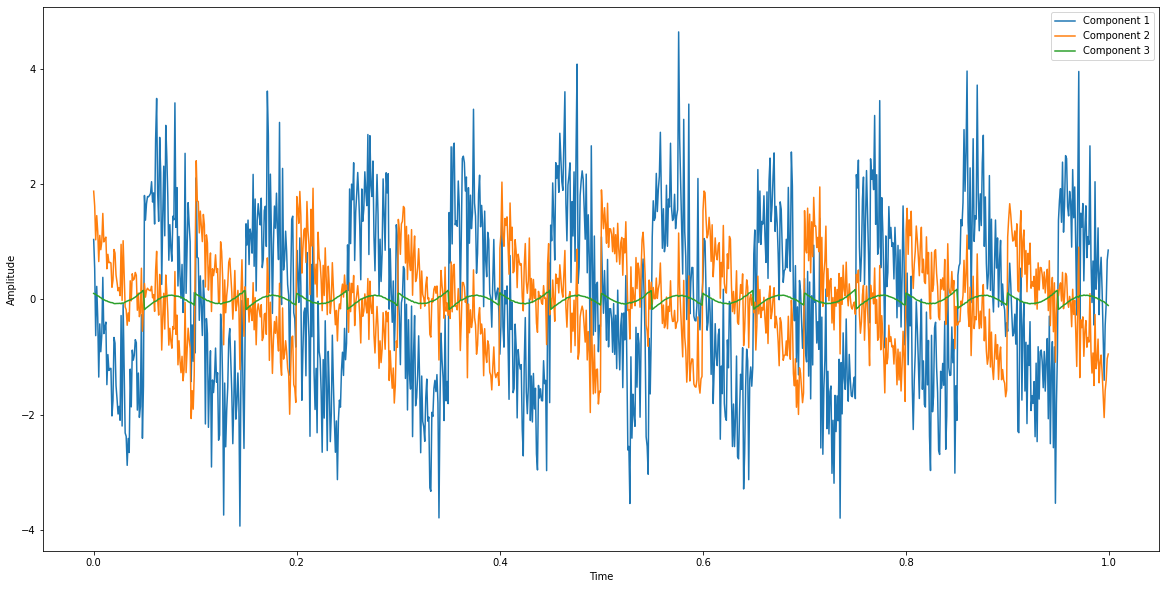

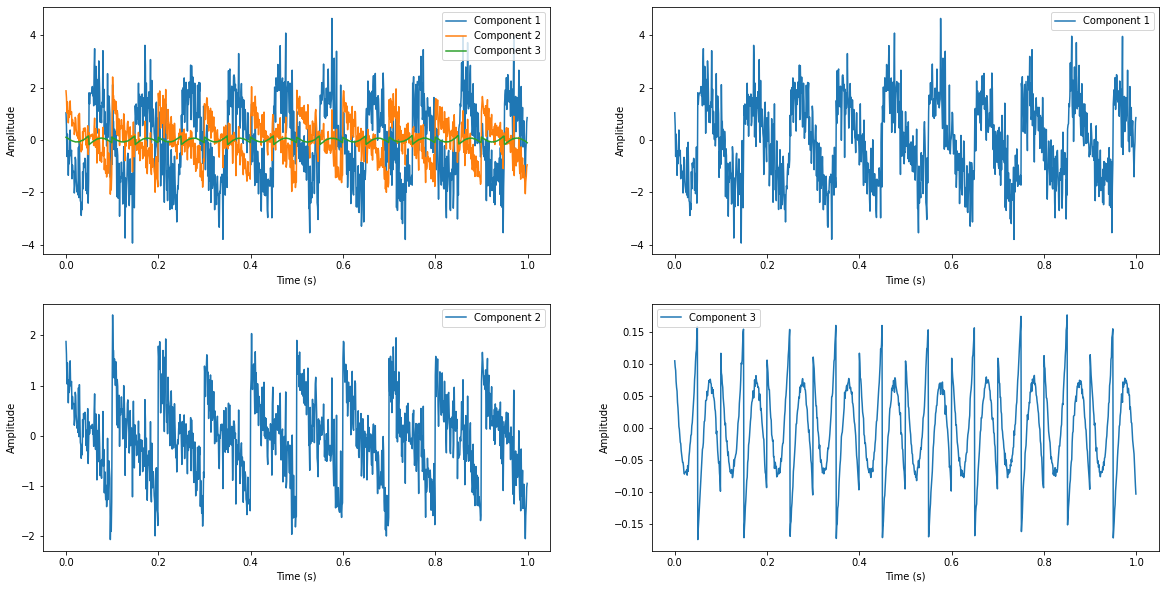

In [19]:
pca = PCA(n_components=3)
S_ = pca.fit_transform(np.array([signal1, signal2, signal3]).T)  # Reconstruct signals
A_ = pca.components_  # Get estimated mixing matrix

plot_components(S_,t)
plot_components_separately(S_,t)

#### Applying ICA on signals

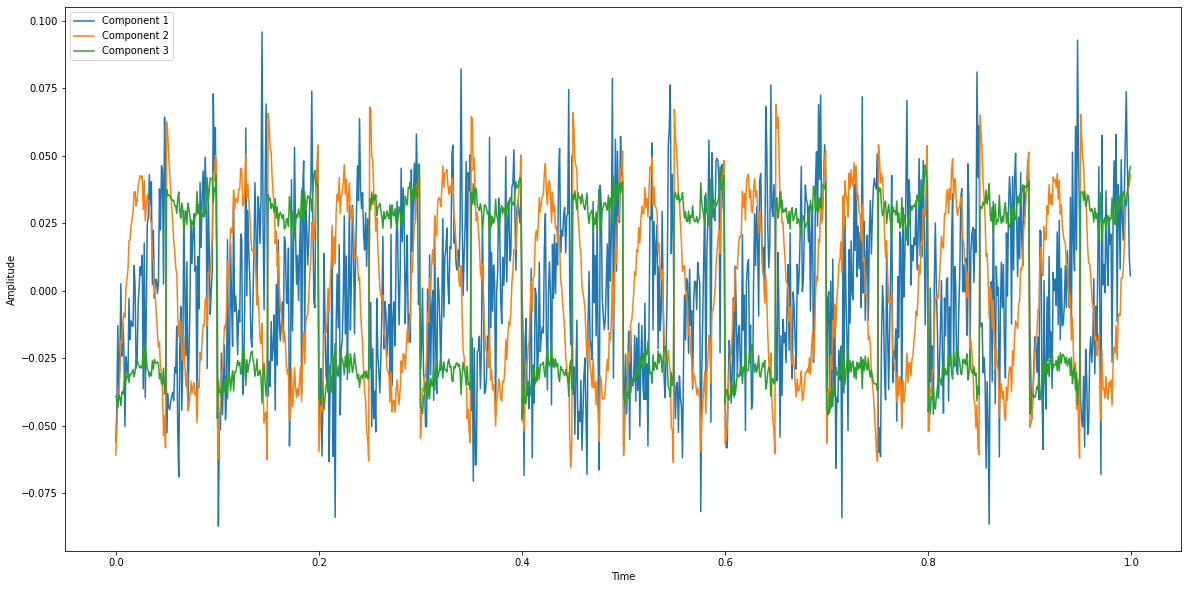

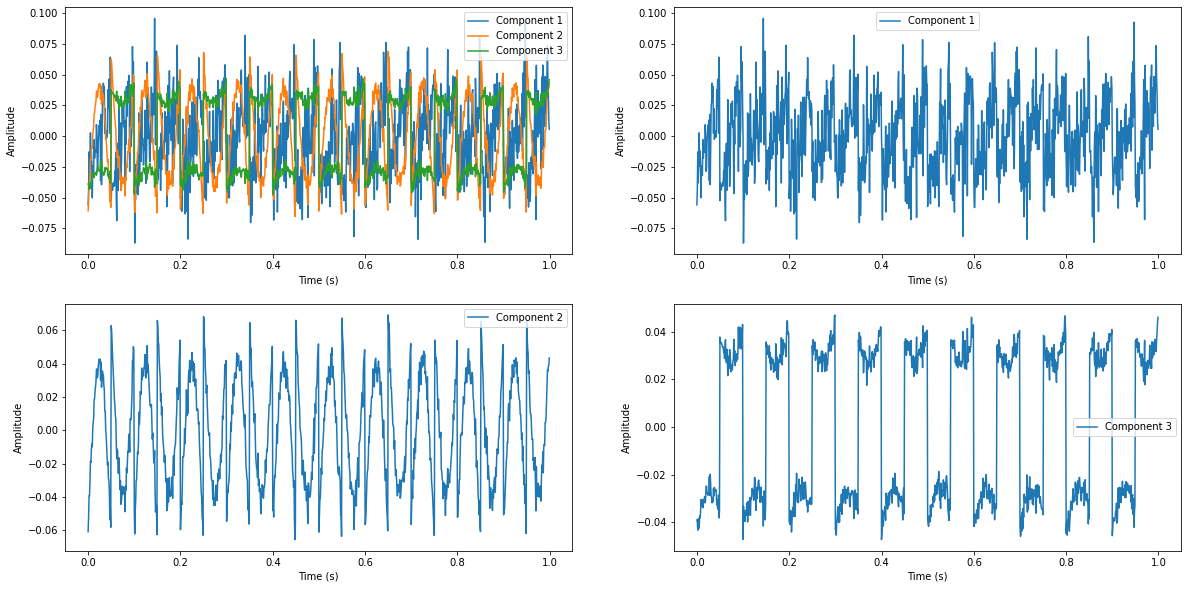

In [20]:
ica = FastICA(n_components=3)
S_ = ica.fit_transform(np.array([signal1, signal2, signal3]).T)  # Reconstruct signals
A_ = ica.mixing_  # Get estimated mixing matrix

plot_components(S_,t)
plot_components_separately(S_,t)

### For the mixture of these signals the PCA looks better than ICA. In PCA we can clearly distinguish sine wave, sawtooth wave and sqaure wave. This is because PCA works better with gaussian noise since it's a linear technique, while the ICA works better with non-gaussian noise since it's a non linear technique.. And also her the SNR is high so PCA is better than ICA since signal component is higher and data can be considered as gaussian.